<a href="https://colab.research.google.com/github/mahi0097/ML_Learning/blob/main/Predict_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
house_df = pd.read_csv('Housing.csv')
print(house_df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
#target value price
#independent variables like bedrooms, bathroom
house_df.isnull().sum().sum()#no null value?

np.int64(0)

In [4]:
#finding mean , median ,mode
price_mean = house_df['price'].mean()
print(price_mean)
price_median = house_df['price'].median()
print(price_median)
price_mode = house_df['price'].mode()
print(price_mode)


4766729.247706422
4340000.0
0    3500000
1    4200000
Name: price, dtype: int64


Data Preprocessing

In [5]:
yes_no_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in yes_no_columns:
    house_df[col] = house_df[col].map({'yes': 1, 'no': 0})

print(house_df[yes_no_columns])  # This will print all converted columns


     mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
0           1          0         0                0                1         1
1           1          0         0                0                1         0
2           1          0         1                0                0         1
3           1          0         1                0                1         1
4           1          1         1                0                1         0
..        ...        ...       ...              ...              ...       ...
540         1          0         1                0                0         0
541         0          0         0                0                0         0
542         1          0         0                0                0         0
543         0          0         0                0                0         0
544         1          0         0                0                0         0

[545 rows x 6 columns]


Using Scaler function

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
house_df[['bedrooms', 'bathrooms', 'area']] = scaler.fit_transform(house_df[['bedrooms', 'bathrooms', 'area']])


using MinmaxScaler *Function*

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
house_df[['area', 'bedrooms', 'bathrooms']] = scaler.fit_transform(house_df[['area', 'bedrooms', 'bathrooms']])


In [8]:
house_df = pd.get_dummies(house_df, columns=['furnishingstatus'], drop_first=True)


In [9]:
# Convert bool to int (very important for sklearn)
bool_cols = house_df.select_dtypes(include='bool').columns
house_df[bool_cols] = house_df[bool_cols].astype(int)


Define Target and Feature Value

In [10]:
x = house_df.drop('price',axis = 1) #feature
y = house_df['price'] #target
print(house_df.dtypes)  # All should now be int64 or float64



price                                int64
area                               float64
bedrooms                           float64
bathrooms                          float64
stories                              int64
mainroad                             int64
guestroom                            int64
basement                             int64
hotwaterheating                      int64
airconditioning                      int64
parking                              int64
prefarea                             int64
furnishingstatus_semi-furnished      int64
furnishingstatus_unfurnished         int64
dtype: object


Split the data set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

import Liner Regression

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

Make Prediction

In [15]:
y_pred = model.predict(X_test)
print(y_pred)

[5164653.90033967 7224722.29802166 3109863.24240338 4612075.3272256
 3294646.25725956 3532275.09556557 5611774.56836474 6368145.98732718
 2722856.95689986 2629405.61585783 9617039.50315579 2798087.30447888
 3171096.76847064 3394639.09125529 3681088.65424276 5263187.74621486
 3035963.47612386 4786122.8004005  4349551.9200572  3572362.09930451
 5774875.2139565  5886993.57919883 2730836.19518458 4727316.47323636
 5244847.52716799 7555324.21605601 3220790.84680269 5191898.79934207
 8143726.91009782 3398814.09825036 6490693.05027926 3315105.90747811
 6708457.36761325 4201738.21071675 3557571.06735186 5836974.50478626
 4808660.67448475 4362878.73613263 3191242.95701509 4596554.93225239
 4566042.8604841  3517779.52374149 7205844.79365835 3983597.27861103
 3749338.70271055 4274731.09125895 6757442.10783741 4037320.43665851
 3769334.90397125 3417627.44377157 7268416.6764461  2802534.35431385
 4341750.61420451 4516422.15345643 3679997.65037848 2678959.06481153
 7498029.17782459 2920366.45493168 

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)


Mean Squared Error (MSE): 1754318687330.6675
Mean Absolute Error (MAE): 970043.4039201641
R2 Score: 0.6529242642153177


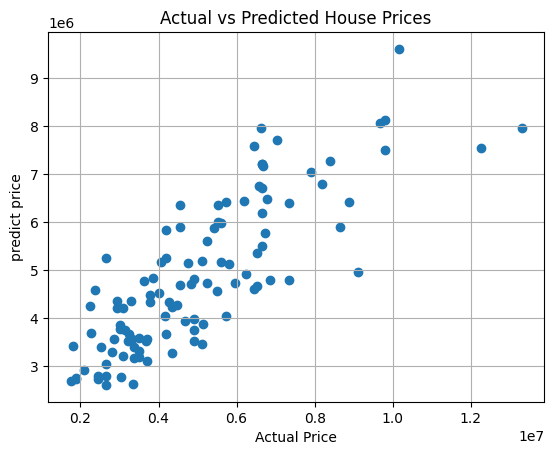

In [18]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("predict price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()